In [2]:
import netCDF4
import numpy as np
import csv
import pandas as pd  #python for data analysys
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors

meridians = np.arange(10.,35.,5.)
pararels = np.arange(45.,52.,1.)

dic_coef={'BAP':1,'CO':1.16,'NO':1.24,'NO2':1.912,'O3':2,'SO2':2.66,'PM25':1,'PM10':1}

grid=netCDF4.Dataset("C:/Users/Assa/Documents/Assa/SHMU/skolenie_python/GRIDCRO2D_01012015.nc")

In [3]:
lon=np.array(grid.variables['LON'][0,0,:,:])
lat=np.array(grid.variables['LAT'][0,0,:,:])

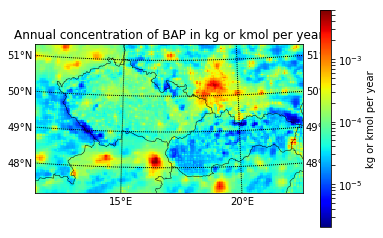

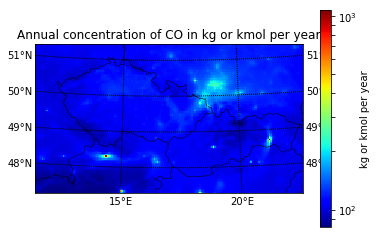

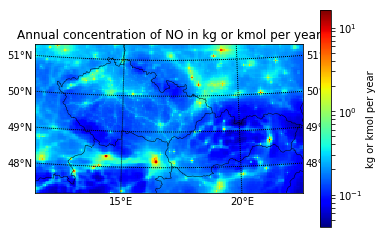

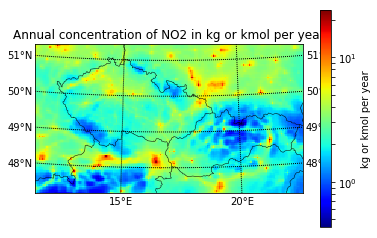

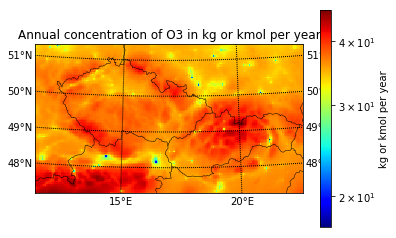

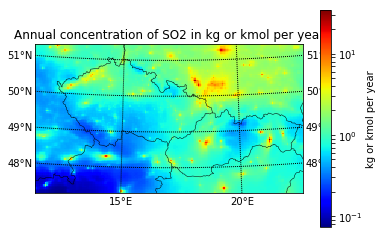

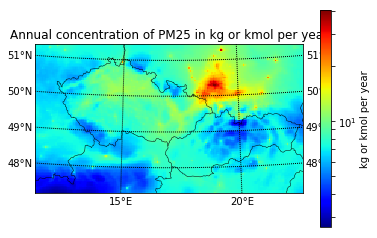

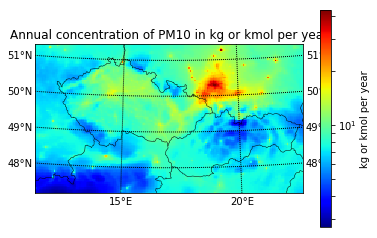

In [4]:
dic_annual_conc_FUME={}
for i in dic_coef.keys():
    if i == 'PM25' or i == 'PM10':
       i_netcdf='PM'
    else:
        i_netcdf=i
    
    model=netCDF4.Dataset("C:/Users/Assa/Documents/Assa/SHMU/skolenie_python/SHMU/LIFEIP/LIFEIP_Small_{0}_2015".format(i_netcdf))
    dic_annual_conc_FUME[i]=np.average(np.array(model.variables[i])[:,0,:,:],axis=0)
    mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=49.375,lon_0=17.0,width=833780,height=466351,resolution='i')
    mapb.drawcountries()
    mapb.drawmeridians(meridians,labels=[False,True,False, True, False])
    mapb.drawparallels(pararels,labels=[True,True,True, True,True,True])
    mapb.pcolormesh(lon,lat,dic_annual_conc_FUME[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm())
    plt.colorbar(label='kg or kmol per year')
    plt.title('Annual concentration of {0} in kg or kmol per year'.format(i))
    plt.show()
    #plt.savefig('C:/Users/Assa/Documents/Assa/SHMU/skolenie_python/obrazky/{0}_con.png'.format(i))
    plt.close()


In [5]:
emissions=netCDF4.Dataset('C:/Users/Assa/Documents/Assa/SHMU/skolenie_python/SHMU/LIFEIP/EMISIONS_FUME_2015.nc')

# save 2-d fields of annual emissions in the numpy array and dictionary dic_ann 
dic_ann={}
for i in emissions.variables.keys():
    if i !='TFLAG' and i!='PNO3':
       dic_ann[i]=np.array(emissions.variables[i][0,0,:,:])
      # data_corr['emissions']=list(emissions.variables.keys())[:]

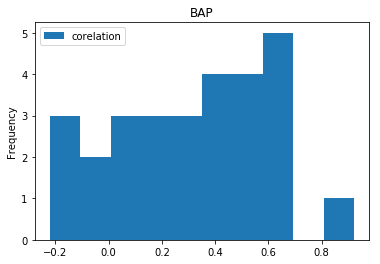

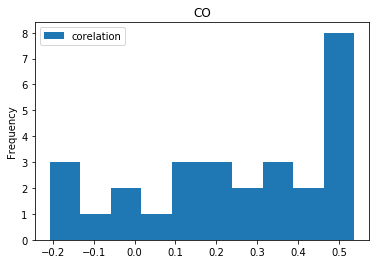

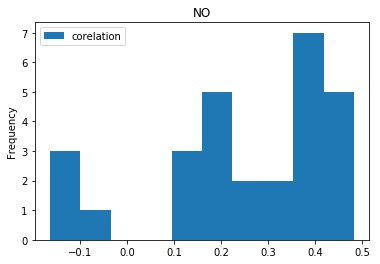

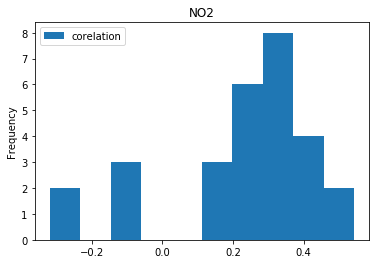

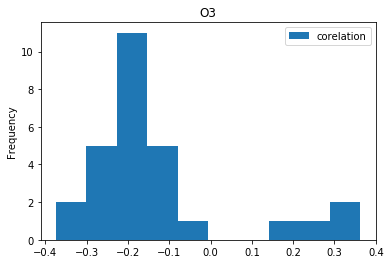

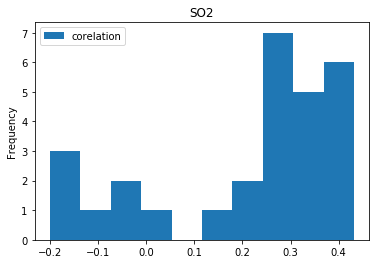

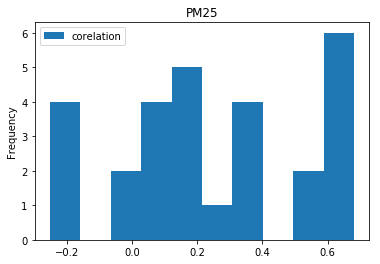

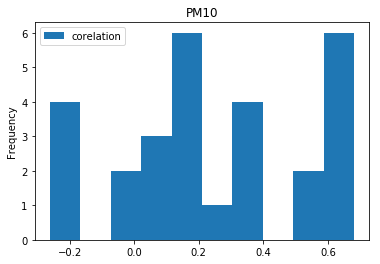

In [6]:
corr_FUME = np.zeros([28,8])
emis=list()
col=[]
data_corr_1=pd.DataFrame()
for i,e1 in enumerate(dic_annual_conc_FUME):
    col.append(e1)
    for j,e2 in enumerate(dic_ann.keys()):
        a = dic_annual_conc_FUME[e1]
        b = dic_ann[e2]
        corr_FUME[j,i]=np.corrcoef(a.flatten(),b.flatten())[0,1]
        e2_fume=e2+'_FUME'
        emis.append(e2_fume)
    data_corr = pd.DataFrame()
    data_corr['corelation']=corr_FUME[:,i]
    data_corr.plot.hist()
    plt.title('{0}'.format(e1))
    data_corr_1[e1]=corr_FUME[:,i]
data_e=pd.DataFrame()
data_e['emission']=emis
data_corr_spolu = data_corr_1.join(data_e)   

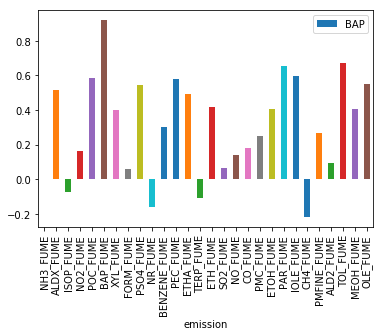

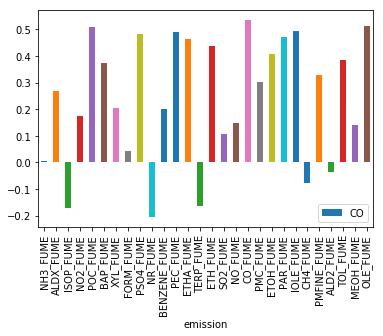

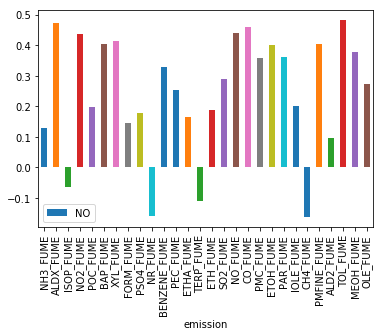

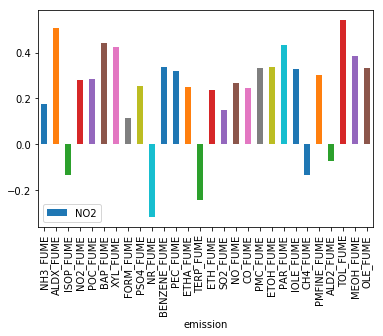

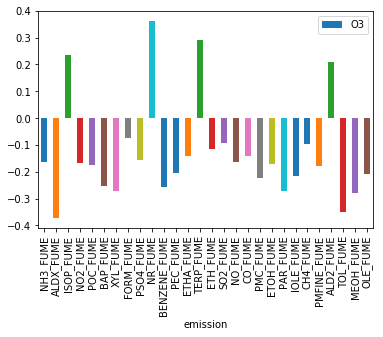

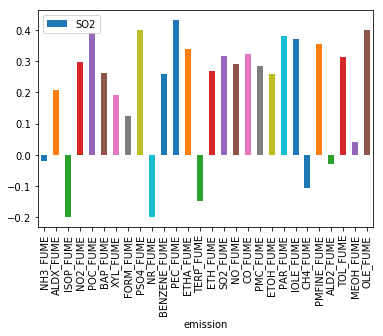

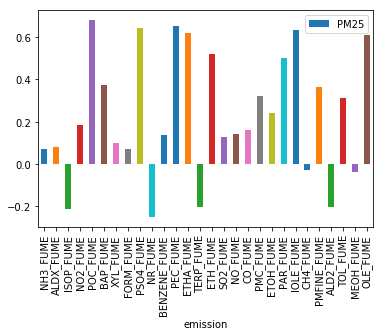

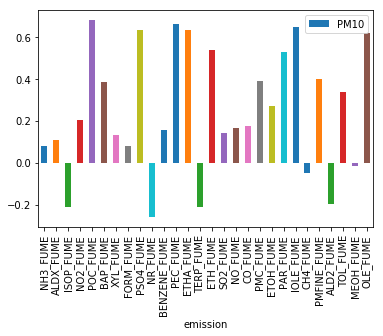

In [7]:
for i in col:
    data_corr_spolu.plot.bar(x='emission',y=i )

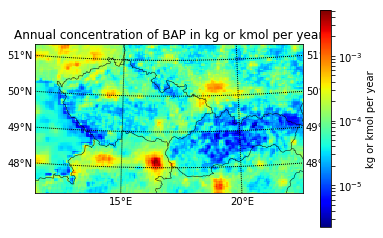

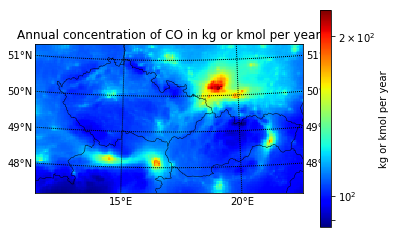

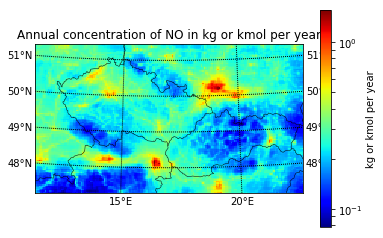

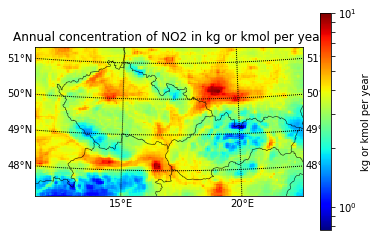

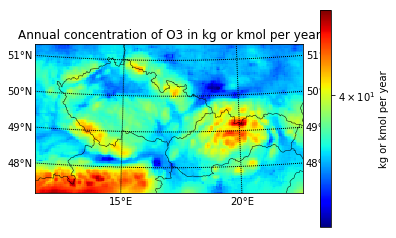

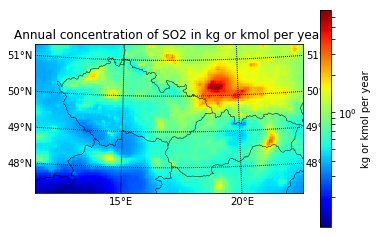

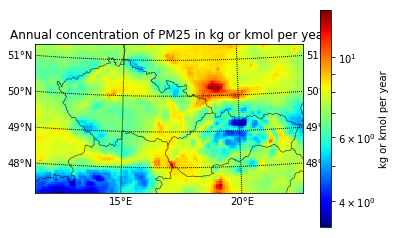

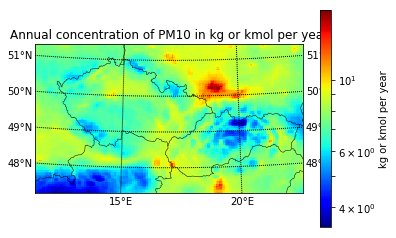

In [8]:
dic_annual_conc_SMOKE={}
for i in dic_coef.keys():
    if i == 'PM25' or i == 'PM10':
       i_netcdf='PM'
    else:
        i_netcdf=i
    
    model1=netCDF4.Dataset("C:/Users/Assa/Documents/Assa/SHMU/skolenie_python/SHMU/LIFEIP/Joh_Small_{0}_2015".format(i_netcdf))
    dic_annual_conc_SMOKE[i]=np.average(np.array(model1.variables[i])[:,0,:,:],axis=0)
    mapb1=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=49.375,lon_0=17.0,width=833780,height=466351,resolution='i')
    mapb1.drawcountries()
    mapb1.drawmeridians(meridians,labels=[False,True,False, True, False])
    mapb1.drawparallels(pararels,labels=[True,True,True, True,True,True])
    mapb1.pcolormesh(lon,lat,dic_annual_conc_SMOKE[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm())
    plt.colorbar(label='kg or kmol per year')
    plt.title('Annual concentration of {0} in kg or kmol per year'.format(i))
    plt.show()
    #plt.savefig('C:/Users/Assa/Documents/Assa/SHMU/skolenie_python/obrazky/{0}_con.png'.format(i))
    plt.close()


In [9]:
emissions_SMOKE=netCDF4.Dataset('C:/Users/Assa/Documents/Assa/SHMU/skolenie_python/SHMU/LIFEIP/EMISIONS_SMOKE_2015.nc')

# save 2-d fields of annual emissions in the numpy array and dictionary dic_ann 
dic_ann_SMOKE={}
for i in emissions_SMOKE.variables.keys():
    if i !='TFLAG' and i!='PNO3':
       dic_ann_SMOKE[i]=np.array(emissions_SMOKE.variables[i][0,0,:,:])
      # data_corr['emissions']=list(emissions.variables.keys())[:]

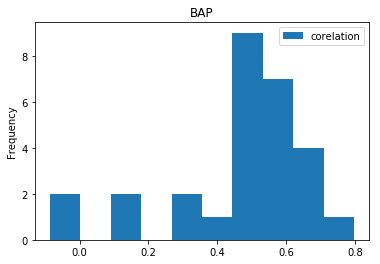

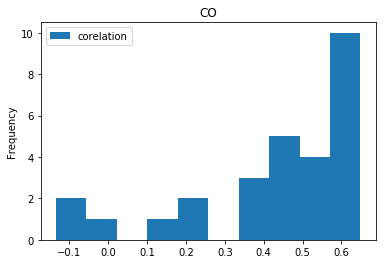

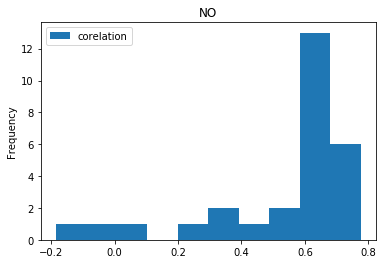

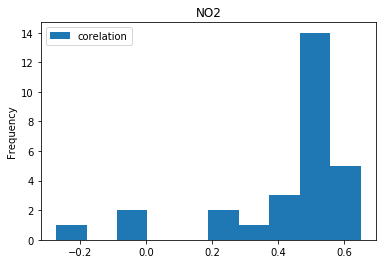

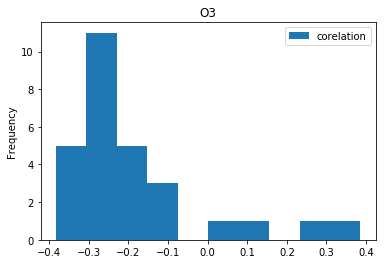

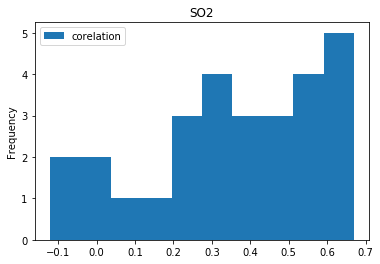

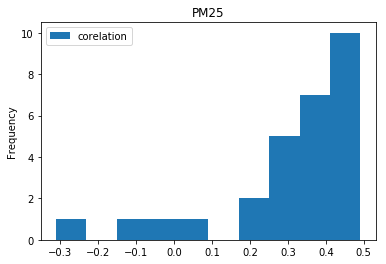

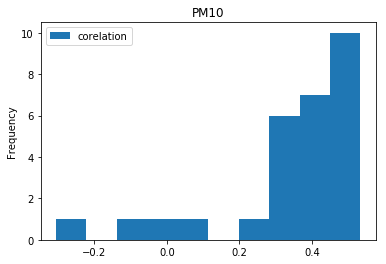

In [10]:
corr_SMOKE = np.zeros([28,8])
emis=list()
col=[]
data_corr1_SMOKE=pd.DataFrame()
for i,e1 in enumerate(dic_annual_conc_SMOKE.keys()):
    col.append(e1)
    for j,e2 in enumerate(dic_ann_SMOKE.keys()):
        a = dic_annual_conc_SMOKE[e1]
        b = dic_ann_SMOKE[e2]
        corr_SMOKE[j,i]=np.corrcoef(a.flatten(),b.flatten())[0,1]
        emis.append(e2)
    data_corr_SMOKE = pd.DataFrame()
    data_corr_SMOKE['corelation']=corr_SMOKE[:,i]
    data_corr_SMOKE.plot.hist()
    plt.title('{0}'.format(e1))
    data_corr1_SMOKE[e1]=corr_SMOKE[:,i]
data_e=pd.DataFrame()
data_e['emission']=emis
data_corr_SMOKEspolu = data_corr1_SMOKE.join(data_e)

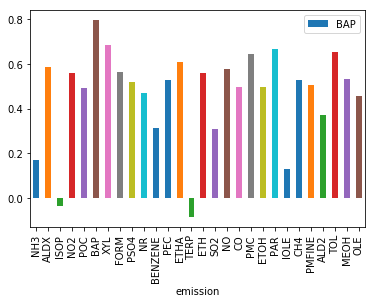

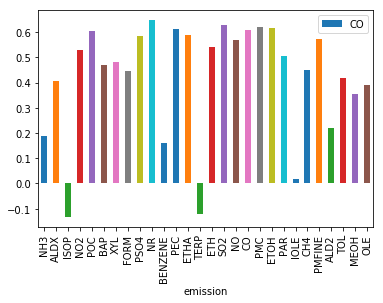

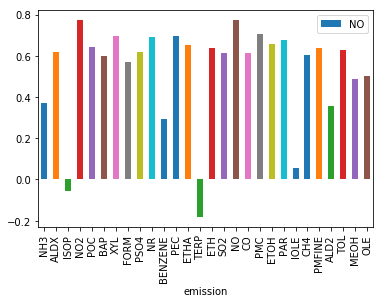

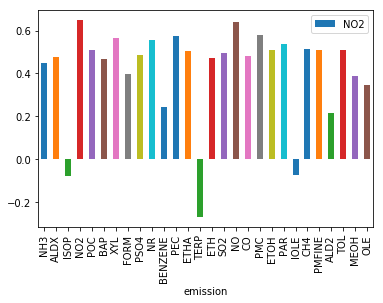

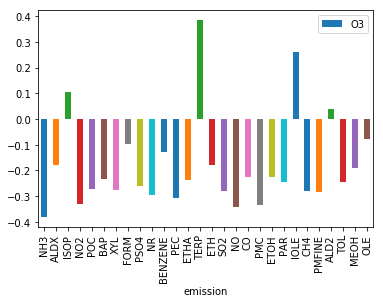

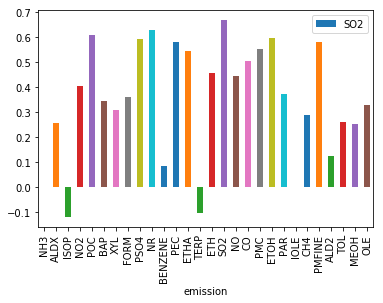

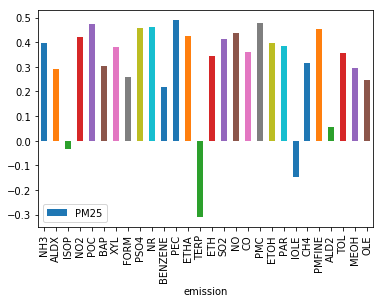

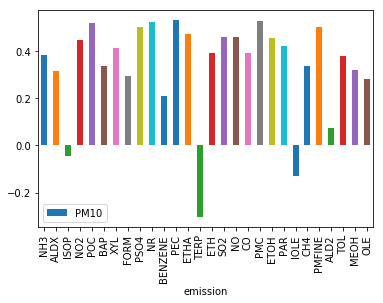

In [11]:
for i in col:
    data_corr_SMOKEspolu.plot.bar(x='emission',y=i )

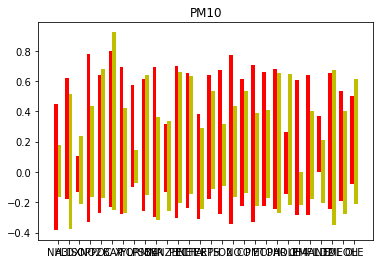

In [18]:
width = 0.35
for i,e1 in enumerate(col):
    data_corr_SMOKE = {}
    data_corr_FUME = {}
    #data_corr_SMOKE[e1]=corr_SMOKE[:,i]
    for j in range(28):
        data_corr_SMOKE[emis[j]]=corr_SMOKE[j,i]
        data_corr_FUME[emis[j]]=corr_FUME[j,i]
    plt.bar(data_corr_SMOKE.keys(), data_corr_SMOKE.values(), -width, align='edge',color='r', label='SMOKE')
    plt.bar(data_corr_FUME.keys(), data_corr_FUME.values(), +width, align='edge', color='y', label='FUME')
    plt.title('{0}'.format(e1))
    #data_e=pd.DataFrame()
    #data_e['emission']=emis
    #data_SMOKE = data_corr_SMOKE.join(data_e)
    #data_SMOKE.set_index('emission',inplace=True)

In [ ]:
data_corr_SMOKE